#### SECTION A BATCH 1
#### WEEK 6 DATE: 21 APRIL 2022
### EXER 1

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 6. Write down the meta information about the “wine.csv” data file available in the UCI repository, https://archive.ics.uci.edu/ml/datasets/Wine.

#### Title of Database: Wine recognition data

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


#### The 13 attributes are

1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash 

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10)Color intensity

11)Hue

12)OD280/OD315 of diluted wines

13)Proline 


#### Number of Instances
class 1 59

class 2 71

class 3 48

In [3]:
# importing the wine dataset
df = pd.read_csv("wine.csv")
print(df.shape)
df.head()

(178, 14)


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# printing quick summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

 There are no missing values in any of the variables.

### 7. Tabulate and visualize the distribution of the numeric variables.

In [5]:
# to obtain descriptive statistics for numerical variables
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
#Let's see the frequency of the variable target.
#Convert variable to categorical.
df.Class=df.Class.astype('category')
freq=df['Class'].value_counts()

freq

2    71
1    59
3    48
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

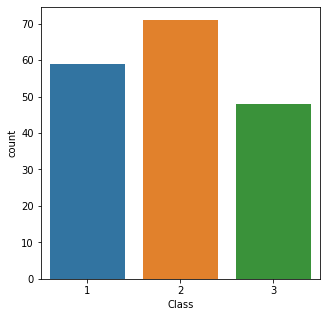

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(df.Class)

In [8]:
numeric_features = df.select_dtypes(include = 'number')

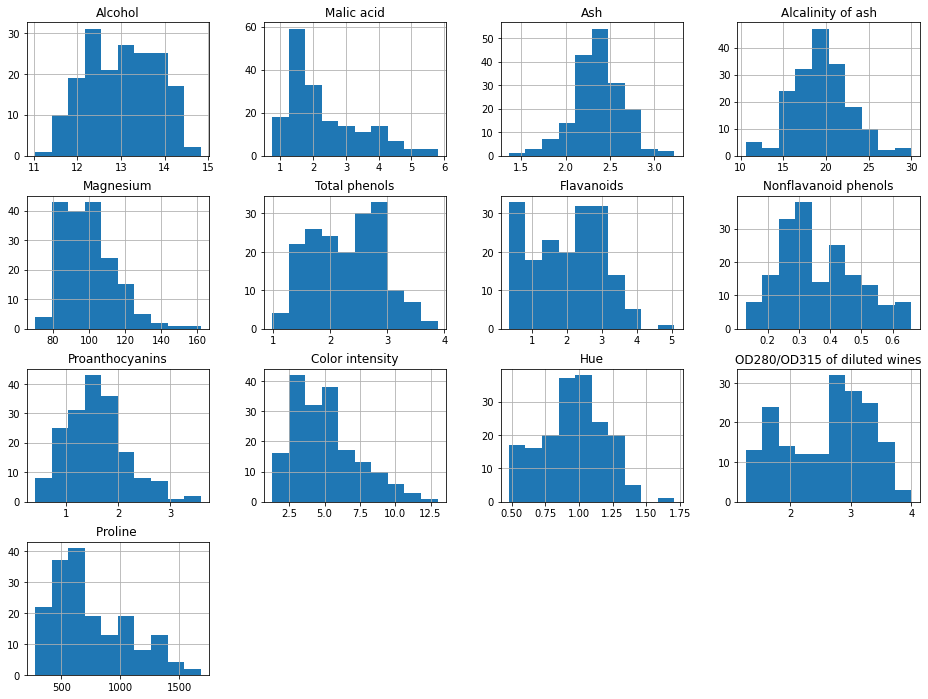

In [9]:
df.hist(bins=10, figsize=(16,12))
plt.show()

From the basic statistical values we can see that none of the variables follows a normal distribution, since none has mean 0 and standard deviation 1

### 8. Perform the required preprocessing , 70,30 split and build a classifier using the Multi-Layer Perceptron Classifier model available in SciKit Learn. Use 3 layers with the same number of neurons as there are features along with 500 max iterations

In [10]:
#Splitting the predictor & response variables
X = df.drop(columns = ['Class'],axis =1)
y = df.Class

In [11]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [12]:
# Spliting of the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 42)

In [13]:
# Importing Multi-Layer Perceptron Classifier model
from sklearn.neural_network import MLPClassifier

#Create a MLP Classifier
model = MLPClassifier(hidden_layer_sizes=(13,13,13), activation='relu', max_iter=500,learning_rate_init=0.5)

#Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [14]:
# Evaluating our model
accuracy_score(y_test,y_pred)

0.9259259259259259

### 9. Tabulate the precision, recall and F1-score

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.84      1.00      0.91        21
           3       1.00      0.79      0.88        14

    accuracy                           0.93        54
   macro avg       0.95      0.91      0.92        54
weighted avg       0.94      0.93      0.93        54



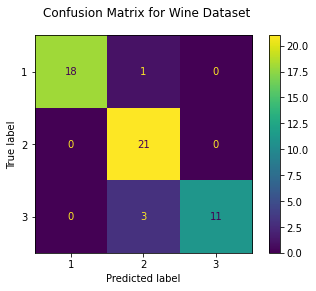

In [16]:
# Plotting a confusion matrix
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for Wine Dataset")
plt.show()

### 10. Display the MLP weights and biases after training your model.


In [17]:
# the function .coefs_ prints the weights associated between 
# each succesive layer
model.coefs_

[array([[ 1.16256787, -3.54936052, -1.14419672,  5.40170251,  3.25769801,
         -3.74850077, -1.29436682,  1.23969929,  4.95911028, -2.81478982,
         -3.55651279, -1.42104553, -3.2750341 ],
        [-2.30808847,  1.07219858,  0.15232849,  0.62870857,  3.34427749,
         -1.3639137 , -2.35422456,  0.55667335, -0.29949128,  0.92294862,
         -0.96085161, -2.34088404, -5.01616809],
        [-2.37608487, -1.88218729, -1.43144979,  0.35686543,  1.12910182,
         -2.38870233, -2.35933531, -3.94802778,  1.83697851,  2.61091613,
         -5.54261622, -0.62527895, -3.93086794],
        [-1.3140148 ,  2.66338658,  1.88930817, -3.80082684,  2.08941332,
          1.9836475 , -1.46423252, -1.07447947, -5.34976239,  3.02026551,
          0.13277491, -1.22745056, -0.43182298],
        [ 1.84572253, -2.14673573, -1.71688027,  2.40434146,  0.9080787 ,
         -2.82069116,  0.8617478 ,  1.95980266,  0.32069801, -1.59445347,
         -2.1951143 ,  0.73606761,  0.43401548],
        [ 2.119

In [18]:
# the function .coefs_ prints the bias values at each layer
model.intercepts_

[array([-4.29906137, -1.65683671, -4.17310516, -3.6237079 ,  1.26955374,
        -2.16537873, -1.89650415,  0.74648347,  0.41726061, -2.81759866,
        -3.18113045, -4.26629721, -0.85597586]),
 array([-2.17068092, -3.60643518, -4.18975484, -2.69804663, -1.11524108,
        -2.73252412, -3.55706022, -3.25681097, -3.5327901 , -2.44734813,
        -6.40257633, -1.77499925, -1.05040213]),
 array([-3.2100881 , -3.86635842, -1.90757305, -2.72169832, -1.45563329,
        -3.81202223,  1.46323207, -2.25421059, -3.16232568, -3.32866818,
         0.40331009, -1.6882223 , -1.99586553]),
 array([-1.43645834,  1.75890246, -0.11623645])]